# Author: Abdullah Moosa 03/11/2024

#### **In this notebook the data will be applied on both the Categorical dataset and the Binary one(Dataset 1 and 2)**

##### This code uses the clustering technique Agglomerative Hierarchical Clustering, which is a popular form of hierarchical clustering that groups data points based on their similarity. this works  by treating each data point as an individual cluster. It then repeatedly merges the closest pairs of clusters based on the distance, until all points are merged into a single cluster. The common output is a dendrogram—a tree-like structure—that visually represents the merging process and allows for easy interpretation of the hierarchical relationships between clusters. This technique is particularly useful for uncovering nested groupings within data and analyzing the structure of complex datasets. This technique should allow for the Hierarchical comparision between datasets.




[A. Kassambara, “Agglomerative Hierarchical Clustering,” Datanovia. https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/]


[Abubakar Auwal Khalid, “Agglomerative Hierarchical Clustering: A Study and Implementation in Python,” Medium, Jun. 04, 2023. https://medium.com/@khalidassalafy/agglomerative-hierarchical-clustering-a-study-and-implementation-in-python-fddfdb6a7a64

## Importing Libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering


# **Application on Dataset 1**

## Dataset loading, set up and evaluation

In [19]:
file_paths = {
    '1_ef_b': r'Z:\\coursework\\datasets\\1_binary\\processed\\1_ef_b.csv',
    '1_nrml_b': r'Z:\\coursework\\datasets\\1_binary\\processed\\1_nrml_b.csv',
    '1_ef_ub': r'Z:\\coursework\\datasets\\1_binary\\processed\\1_ef_ub.csv',
    '1_nrml_ub': r'Z:\\coursework\\datasets\\1_binary\\processed\\1_nrml_ub.csv'
}

results = {}

for label, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    true_labels = df['LUNG_CANCER']
    df_numerical = df.drop(['LUNG_CANCER'], axis=1, errors='ignore')
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_numerical)
    silhouette_scores = []
    davies_bouldin_scores = []
    wcss = []
    cluster_range = range(2, 6)

    for n_clusters in cluster_range:
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        labels = agglomerative.fit_predict(df_scaled)
        cluster_centers = np.array([df_scaled[labels == i].mean(axis=0) for i in range(n_clusters)])
        distances = np.linalg.norm(df_scaled - cluster_centers[labels], axis=1)
        wcss.append(np.sum(distances ** 2))
        silhouette_scores.append(silhouette_score(df_scaled, labels))
        davies_bouldin_scores.append(davies_bouldin_score(df_scaled, labels))


    results[label] = {
        "Silhouette Scores": silhouette_scores,
        "Davies-Bouldin Scores": davies_bouldin_scores,
        "WCSS": wcss,
        "Best Silhouette Score": max(silhouette_scores),
        "Best Davies-Bouldin Index": min(davies_bouldin_scores),
        "Optimal Clusters (Silhouette)": cluster_range[np.argmax(silhouette_scores)],
        "Optimal Clusters (Davies-Bouldin)": cluster_range[np.argmin(davies_bouldin_scores)]
    }

 The main function of this code is to evaluate different datasets by applying Agglomerative Clustering and calculating three metrics: Silhouette Score, Davies Bouldin Index, and WCSS (Elbow Method). For each variation of dataset 1, it loads the data, scales the features, and then loops through a range of cluster numbers (2 to 5) to compute the clustering metrics. The results, including optimal cluster counts based on the highest Silhouette Score and lowest Davies Bouldin Index, are stored in a dictionary for comparison. This process helps identify the best-performing variation of dataset 1 and optimal cluster count based on clustering quality.

## Visualizing Results of Evaluation

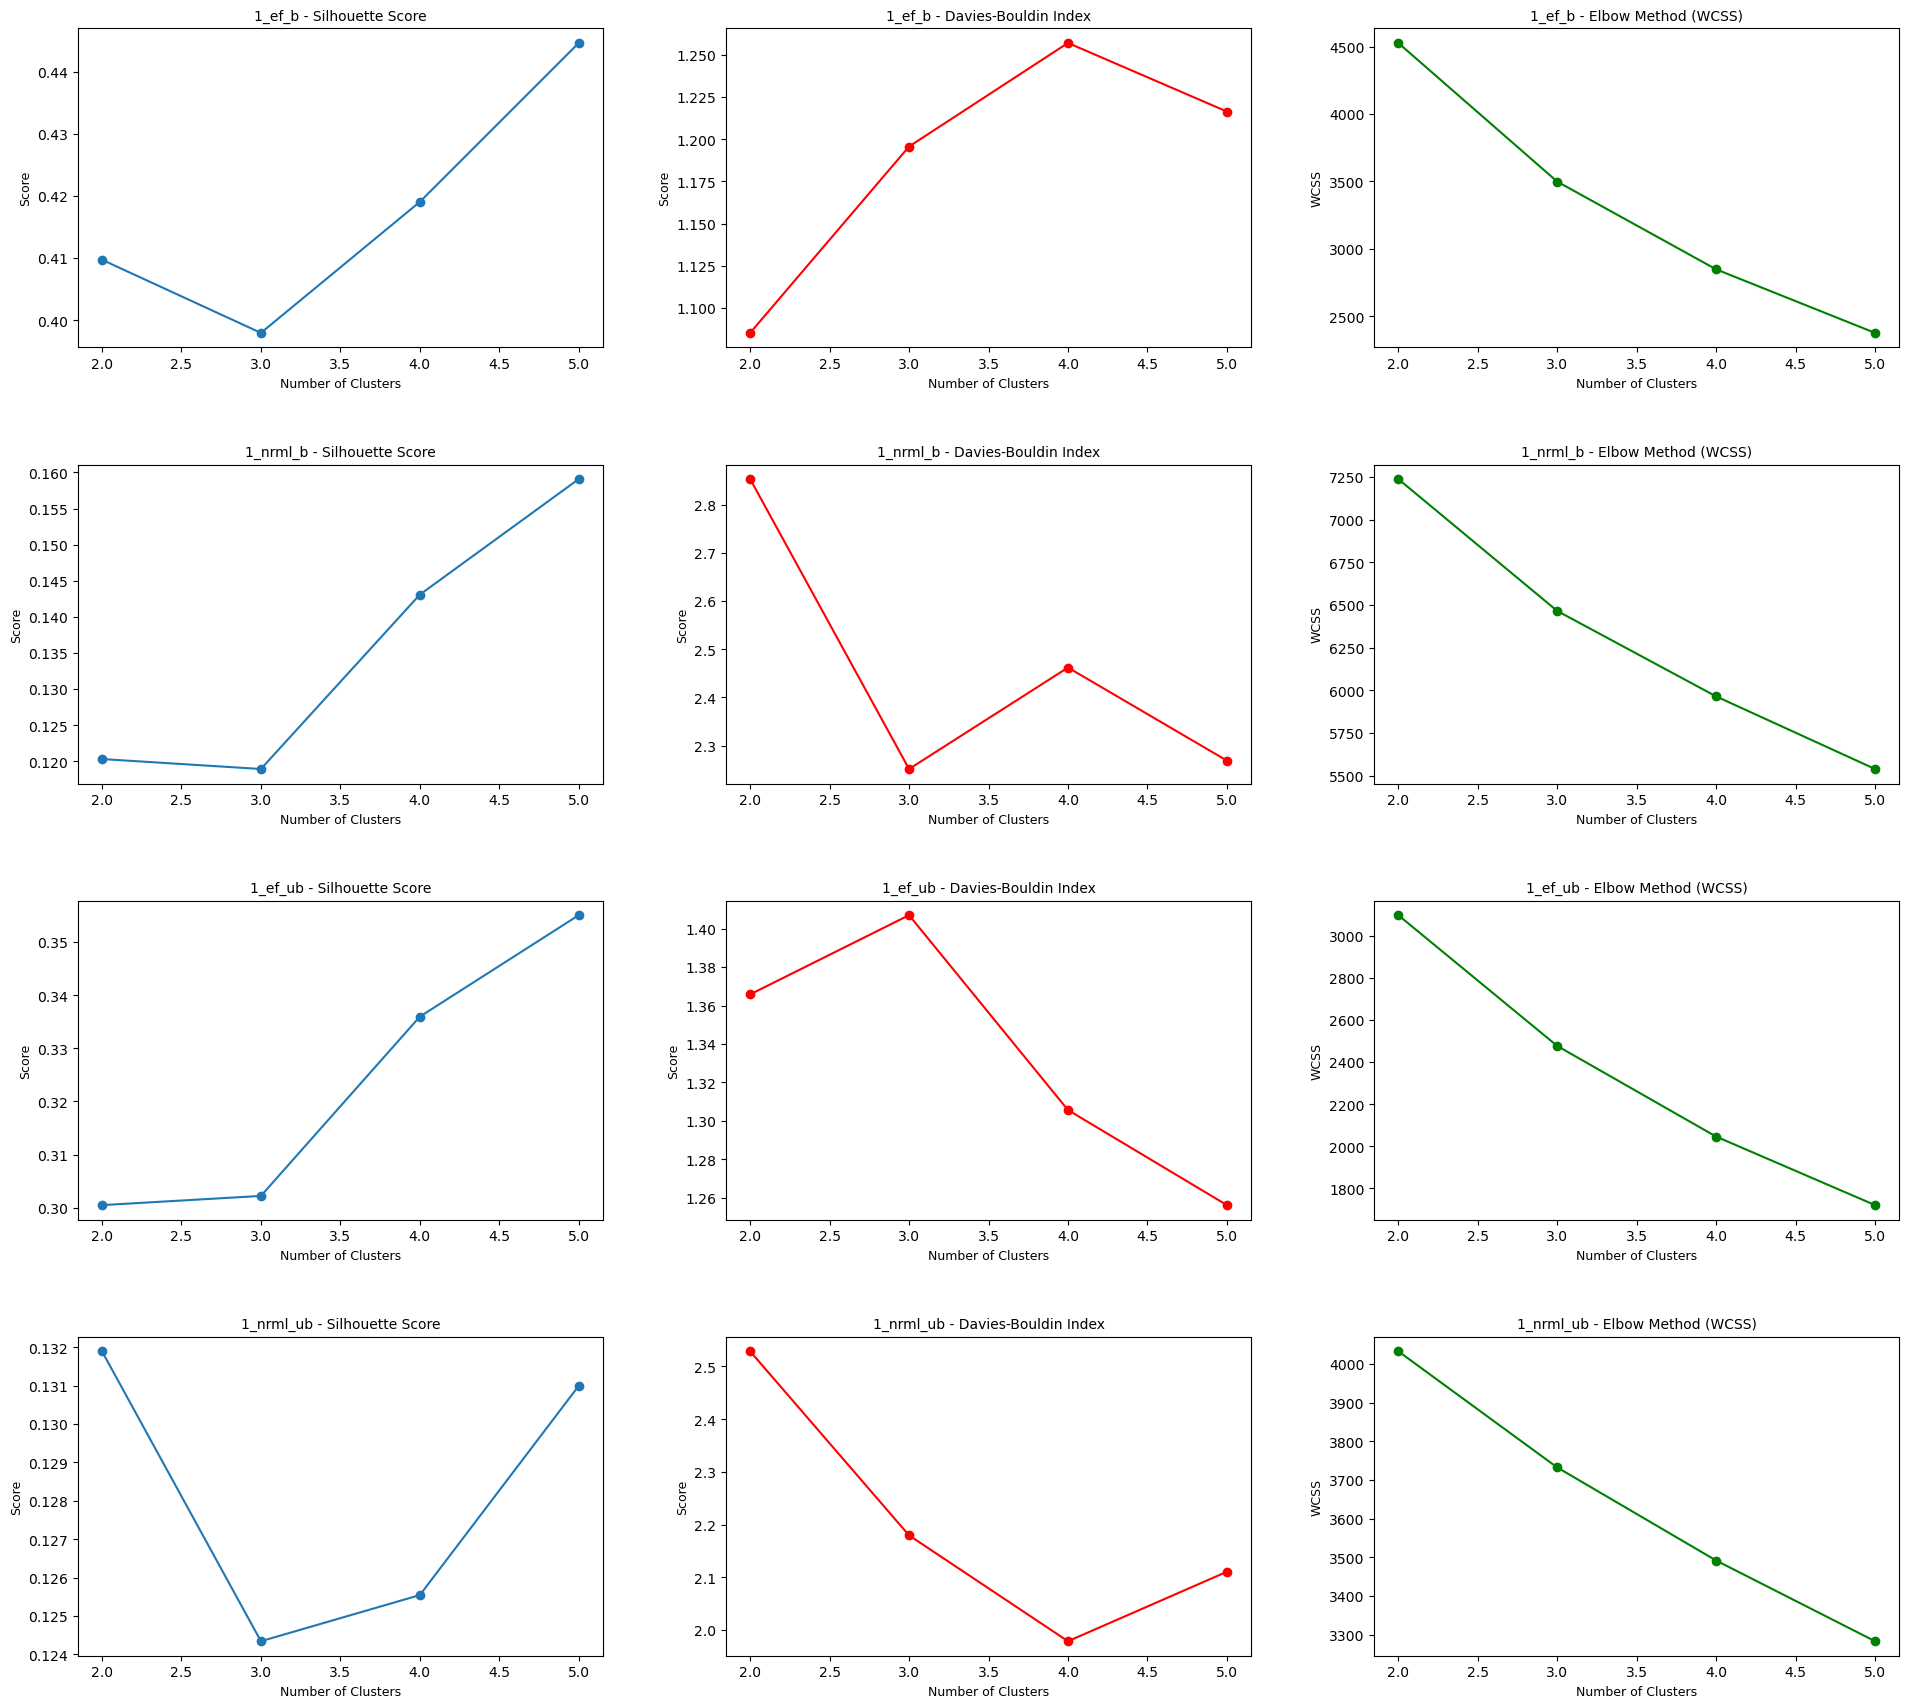


Dataset: 1_ef_b
Optimal number of clusters based on Silhouette Score: 5
Best Silhouette Score: 0.4446
Optimal number of clusters based on Davies-Bouldin Index: 2
Best Davies-Bouldin Index: 1.0852

Dataset: 1_nrml_b
Optimal number of clusters based on Silhouette Score: 5
Best Silhouette Score: 0.1591
Optimal number of clusters based on Davies-Bouldin Index: 3
Best Davies-Bouldin Index: 2.2517

Dataset: 1_ef_ub
Optimal number of clusters based on Silhouette Score: 5
Best Silhouette Score: 0.3551
Optimal number of clusters based on Davies-Bouldin Index: 5
Best Davies-Bouldin Index: 1.2562

Dataset: 1_nrml_ub
Optimal number of clusters based on Silhouette Score: 2
Best Silhouette Score: 0.1319
Optimal number of clusters based on Davies-Bouldin Index: 4
Best Davies-Bouldin Index: 1.9789


In [20]:
plt.figure(figsize=(20, 18))
for i, (label, metrics) in enumerate(results.items()):
    cluster_range = range(2, 6)
    
    plt.subplot(4, 3, i * 3 + 1)
    plt.plot(cluster_range, metrics["Silhouette Scores"], marker='o')
    plt.title(f"{label} - Silhouette Score", fontsize=10)
    plt.xlabel("Number of Clusters", fontsize=9)
    plt.ylabel("Score", fontsize=9)

    plt.subplot(4, 3, i * 3 + 2)
    plt.plot(cluster_range, metrics["Davies-Bouldin Scores"], marker='o', color='red')
    plt.title(f"{label} - Davies-Bouldin Index", fontsize=10)
    plt.xlabel("Number of Clusters", fontsize=9)
    plt.ylabel("Score", fontsize=9)

    plt.subplot(4, 3, i * 3 + 3)
    plt.plot(cluster_range, metrics["WCSS"], marker='o', color='green')
    plt.title(f"{label} - Elbow Method (WCSS)", fontsize=10)
    plt.xlabel("Number of Clusters", fontsize=9)
    plt.ylabel("WCSS", fontsize=9)

plt.tight_layout(pad=4)
plt.show()

for label, metrics in results.items():
    print(f"\nDataset: {label}")
    print(f"Optimal number of clusters based on Silhouette Score: {metrics['Optimal Clusters (Silhouette)']}")
    print(f"Best Silhouette Score: {metrics['Best Silhouette Score']:.4f}")
    print(f"Optimal number of clusters based on Davies-Bouldin Index: {metrics['Optimal Clusters (Davies-Bouldin)']}")
    print(f"Best Davies-Bouldin Index: {metrics['Best Davies-Bouldin Index']:.4f}")


The results above indicate that the variation 1_ef_b (extracted features , balanced dataset) is the best dataset as expected due to its high Silhouette Score and low Davies Bouldin Score which was achieved via feature engineering and balancing of classes , these metrics indicate that it is the best dataset to use for this clustering method. Not to mention , the optimal number of clusters was also identified using WCSS(elbow method) as cluster 4 showed the steepest decesent of the WCSS metric and the optimal silhoutte Score and Davies Bouldin Index

## Visualization of Dendogram

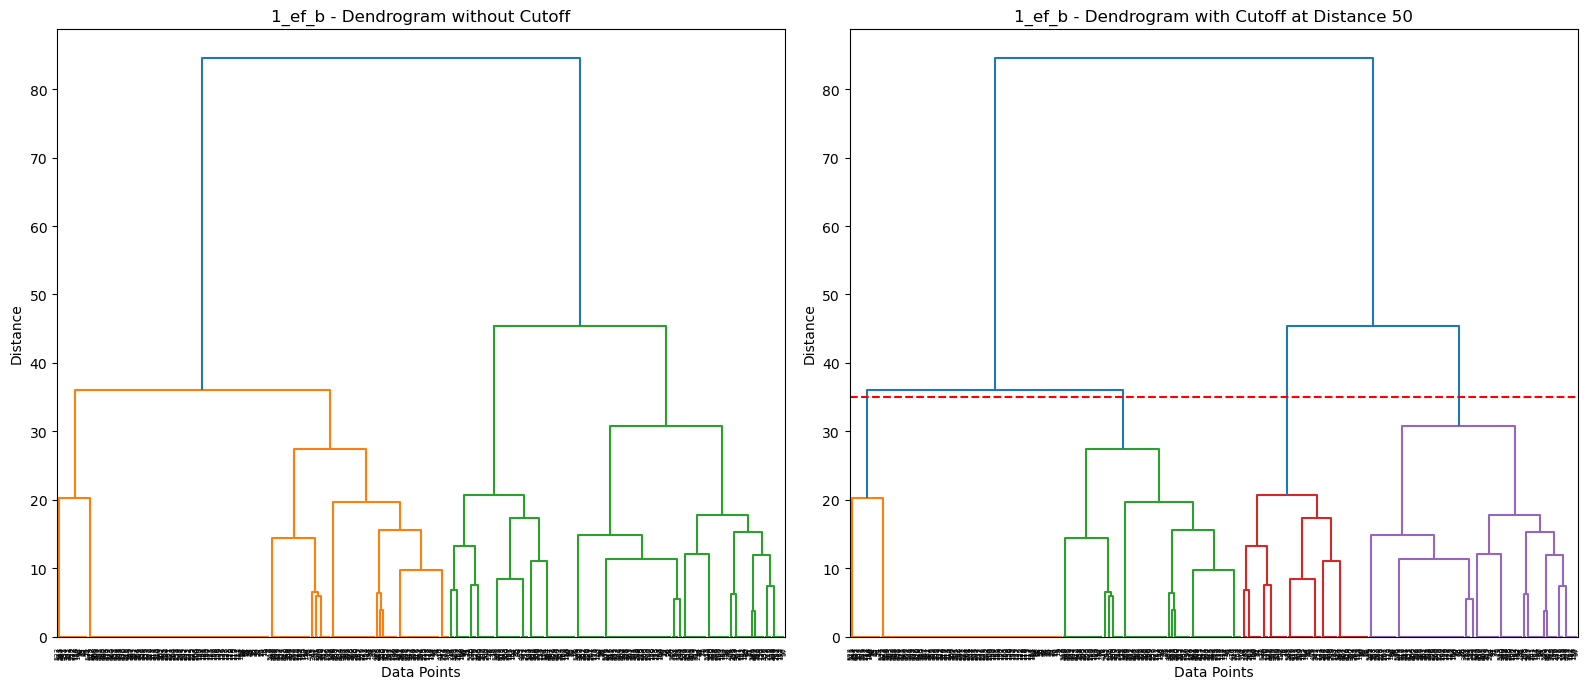

In [21]:
df_1_ef_b = pd.read_csv(file_paths['1_ef_b'])
true_labels_1_ef_b = df_1_ef_b['LUNG_CANCER']
df_numerical_1_ef_b = df_1_ef_b.drop(['LUNG_CANCER'], axis=1, errors='ignore')
scaler = StandardScaler()
df_scaled_1_ef_b = scaler.fit_transform(df_numerical_1_ef_b)
linkage_matrix_1_ef_b = linkage(df_scaled_1_ef_b, method='ward')

plt.figure(figsize=(16, 7))


plt.subplot(1, 2, 1)
dendrogram(linkage_matrix_1_ef_b)
plt.title('1_ef_b - Dendrogram without Cutoff')
plt.xlabel('Data Points')
plt.ylabel('Distance')


plt.subplot(1, 2, 2)
dendrogram(linkage_matrix_1_ef_b, color_threshold=35)
plt.axhline(y=35, color='r', linestyle='--')
plt.title('1_ef_b - Dendrogram with Cutoff at Distance 50')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()


The code above visualizes the hierarchical clustering structure of 1_ef_b using two dendrograms. The cutoff distance obtained by visual analysis shows at around 35, here the algorithm creates four separate clusters. This diagram helps understand how data points are grouped based on similarity at different levels, providing future insight into other possible cluster separations.

## PCA visualization with optimal cluster number

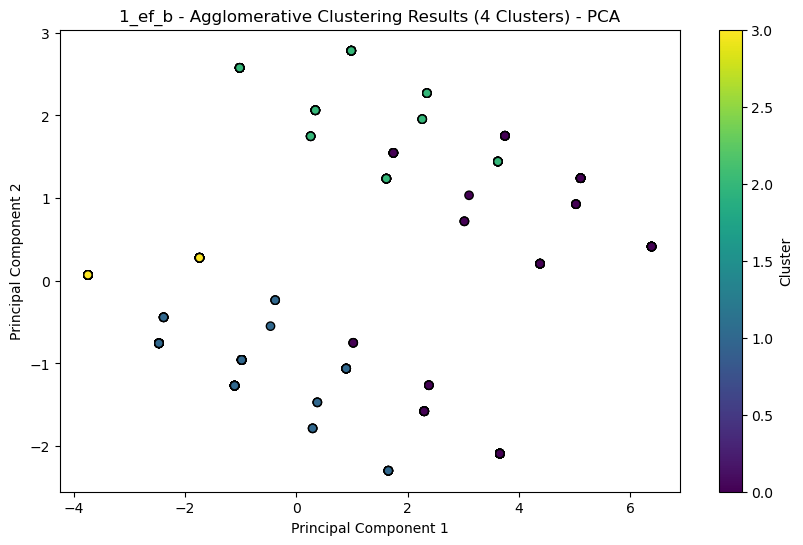

1_ef_b - Explained variance by each component: [0.63444204 0.12415966]


In [22]:
optimal_clusters = 4
agglomerative_1_ef_b = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
final_labels_1_ef_b = agglomerative_1_ef_b.fit_predict(df_scaled_1_ef_b)
pca = PCA(n_components=2)
df_pca_1_ef_b = pca.fit_transform(df_scaled_1_ef_b)


plt.figure(figsize=(10, 6))
plt.scatter(df_pca_1_ef_b[:, 0], df_pca_1_ef_b[:, 1], c=final_labels_1_ef_b, cmap='viridis', marker='o', edgecolor='k')
plt.title("1_ef_b - Agglomerative Clustering Results (4 Clusters) - PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

print("1_ef_b - Explained variance by each component:", pca.explained_variance_ratio_)


The code above uses PCA to reduce the data to two dimensions for easier viewing. The scatter plot shows the four clusters identified by Agglomerative Clustering. Each color represents a cluster, helping us see how they are separated. The explained variance shows how much info each component retains. which when added together is about 75% which shows that the plot provides good meaningful view of cluster assignment , however the clusters are not well seperated

## Confusion Matrix

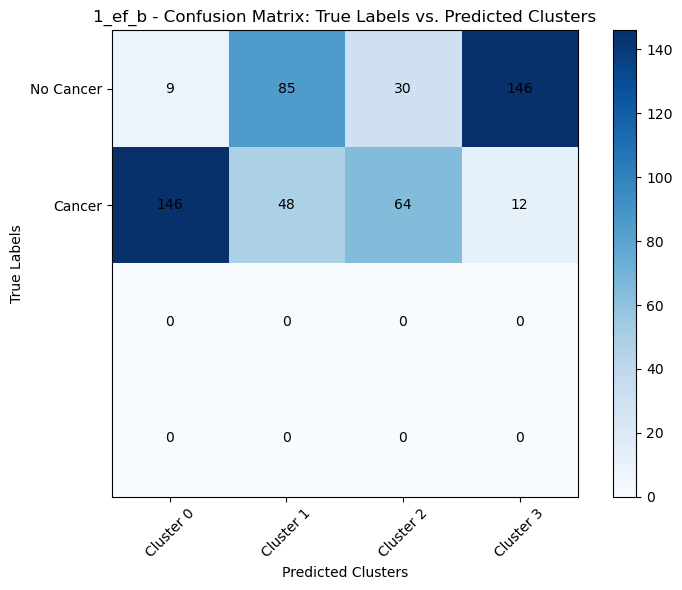

In [23]:
cm_1_ef_b = confusion_matrix(true_labels_1_ef_b, final_labels_1_ef_b)
cluster_labels = [f'Cluster {i}' for i in range(optimal_clusters)]
true_class_labels = ['No Cancer', 'Cancer']

plt.figure(figsize=(8, 6))
plt.imshow(cm_1_ef_b, interpolation='nearest', cmap='Blues')
plt.title("1_ef_b - Confusion Matrix: True Labels vs. Predicted Clusters")
plt.colorbar()
plt.xticks(np.arange(optimal_clusters), cluster_labels, rotation=45)
plt.yticks(np.arange(len(true_class_labels)), true_class_labels)

for i in range(cm_1_ef_b.shape[0]):
    for j in range(cm_1_ef_b.shape[1]):
        plt.text(j, i, format(cm_1_ef_b[i, j], 'd'), ha="center", va="center", color="black")

plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


The confusion matrix shows how each predicted cluster matches the original categories: Lung cancer or not (which was removed for clustering). Cluster 0 mostly contains Cancerous cases, and Cluster 3 mostly captures Non-Cancerous cases. However clusters 1 and 2 share mixed data. This chart helps us see if clustering can act like an unsperivsed classification tool by comparing clusters with actual categories. The results show a partial match however it is not a definitive metric.

# **Application on Dataset 2**

## Dataset loading and set up

In [ ]:
file_path = r'Z:\\coursework\datasets\\2_categorical\\unprocessed\\2_categorical.csv'
df = pd.read_csv(file_path)
true_labels = df['Level']
df_numerical = df.drop(['index', 'Patient Id', 'Level'], axis=1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)


The true label of the class "level" is extracted from the coloumn which could allow for comparing the clustering algorithm's accuracy Next, the DataFrame is created by dropping non-numeric and irrelevant columns (index, Patient Id, and Level). Removing these columns is essential for clustering since non-numeric columns can't be directly used in clustering.

## Standardizing

In [4]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)


The features are standardized using StandardScaler Class to ensure each feature contributes equally to distance calculations. This creates a dataset where all features have a mean of 0 and a standard deviation of 1.

## Evaluating best cluster Number

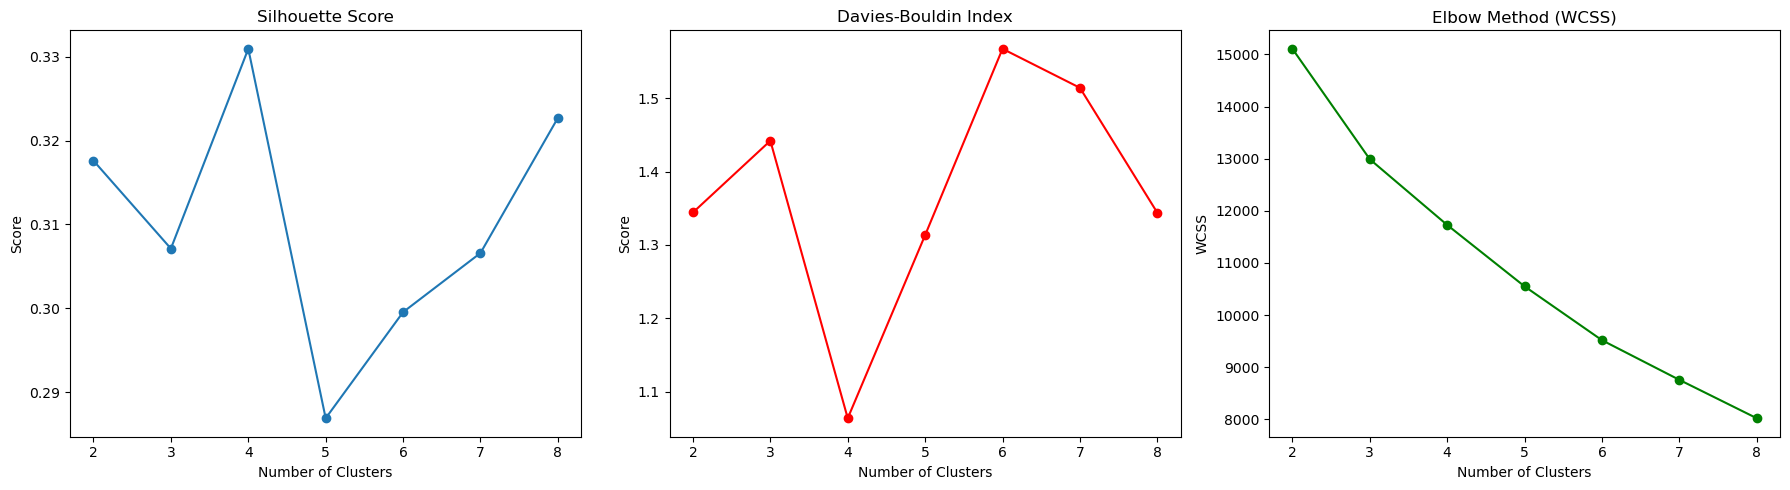

Optimal number of clusters based on Silhouette Score: 4
Best Silhouette Score: 0.3309
Optimal number of clusters based on Davies-Bouldin Index: 4
Best Davies-Bouldin Index: 1.0639


In [5]:
silhouette_scores = []
davies_bouldin_scores = []
wcss = []
cluster_range = range(2, 9)

for n_clusters in cluster_range:
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agglomerative.fit_predict(df_scaled)

    cluster_centers = np.array([df_scaled[labels == i].mean(axis=0) for i in range(n_clusters)])
    distances = np.linalg.norm(df_scaled - cluster_centers[labels], axis=1)
    wcss.append(np.sum(distances ** 2))
    silhouette_scores.append(silhouette_score(df_scaled, labels))
    davies_bouldin_scores.append(davies_bouldin_score(df_scaled, labels))


plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")

plt.subplot(1, 3, 2)
plt.plot(cluster_range, davies_bouldin_scores, marker='o', color='red')
plt.title("Davies-Bouldin Index")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")

plt.subplot(1, 3, 3)
plt.plot(cluster_range, wcss, marker='o', color='green')
plt.title("Elbow Method (WCSS)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

plt.tight_layout()
plt.show()


optimal_clusters_silhouette = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_clusters_silhouette}")
print(f"Best Silhouette Score: {max(silhouette_scores):.4f}")
optimal_clusters_db = cluster_range[np.argmin(davies_bouldin_scores)]
print(f"Optimal number of clusters based on Davies-Bouldin Index: {optimal_clusters_db}")
print(f"Best Davies-Bouldin Index: {min(davies_bouldin_scores):.4f}")



The code above evaluates different numbers of clusters to find the best optimal number of clusters that fits this dataset by applying agglomerative Hierarchical clustering, the value metrics shown above in the graphs are silhoutte score, Davies-Bouldin Index and WCSS(elbow method). It is shown that the cluster number 4 is the best because:

** It has the highest silhoutte score, which shows that the values are seperated well so it has well defined clusters


** It has the lowest Davies-Bouldin Index , which shows that the clusters are compact and seperated


** ALthough WCSS or the elbow method is not showing defined results we can see that cluster number 4 forms the steepest gradient descent , which shows that the clusters are not improving further beyond

## Apply Agglomerative Clustering for 4 clusters

In [6]:
optimal_clusters = 4
agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
final_labels = agglomerative.fit_predict(df_scaled)
df['Cluster'] = final_labels
df[['Cluster']].head(10)

,Cluster
0,0
1,0
2,1
3,2
4,2
5,1
6,0
7,0
8,2
9,0


The code block above uses the optimal cluster number (4) identified in the previous analysis to perform agglomerative hierarchical clustering on the dataset. The clustering labels are assigned to each data point and stored in a new column, Cluster, within the DataFrame.

## Dendogram Visualization

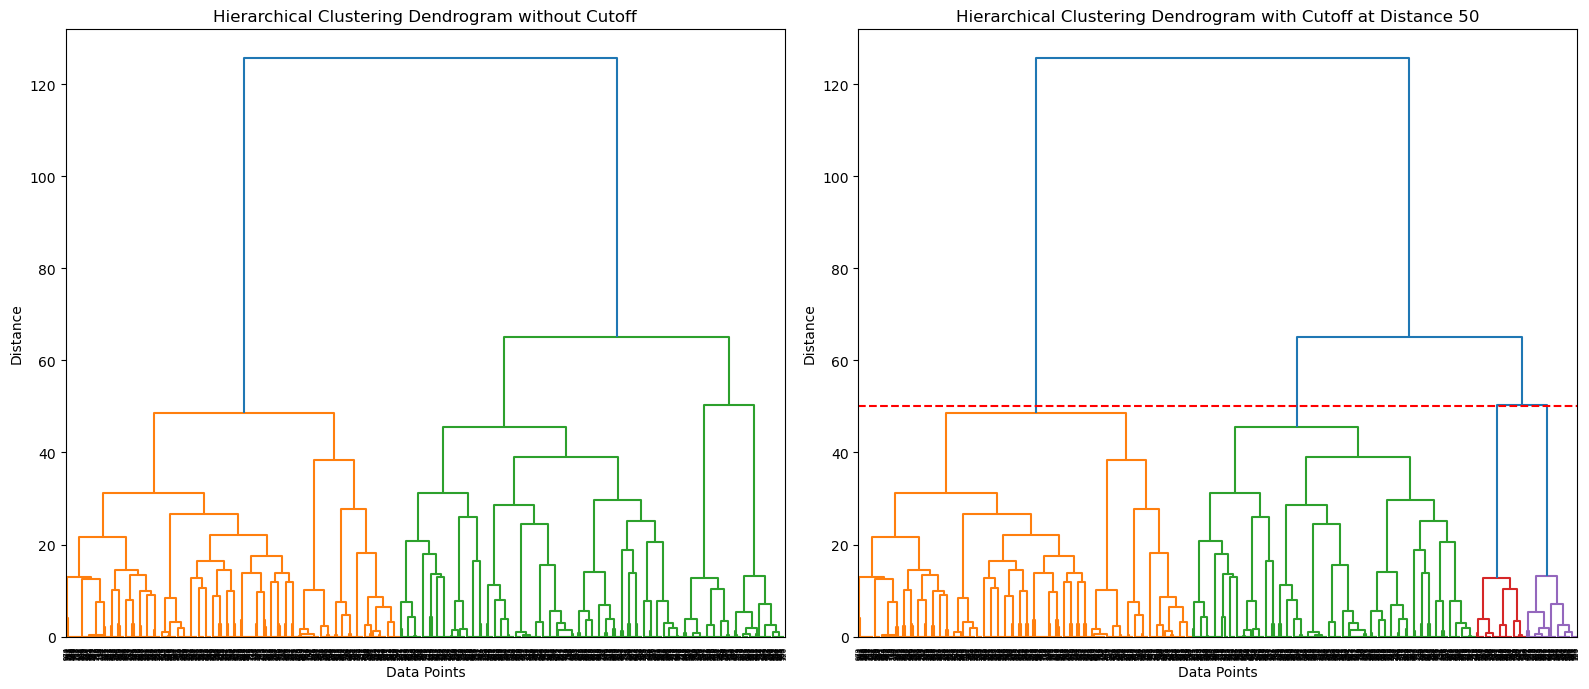

In [7]:
linkage_matrix = linkage(df_scaled, method='ward')
plt.figure(figsize=(16, 7))


plt.subplot(1, 2, 1)
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram without Cutoff')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.subplot(1, 2, 2)
dendrogram(linkage_matrix, color_threshold=50)
plt.axhline(y=50, color='r', linestyle='--')
plt.title('Hierarchical Clustering Dendrogram with Cutoff at Distance 50')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

The code above visualizes the hierarchical clustering structure using two dendrograms. The cutoff distance obtained visually at around 50 creates four separate clusters. This diagram helps understand how data points are grouped based on similarity at different levels, providing insight into other possible cluster separations.

## Applying PCA for optimal clustering number

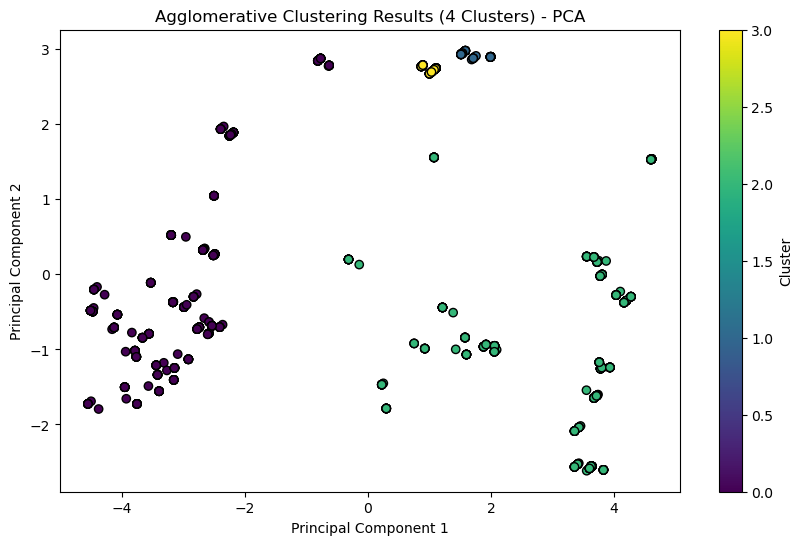

Explained variance by each component: [0.39580565 0.11740061]


In [8]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=final_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title("Agglomerative Clustering Results (4 Clusters) - PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()
print("Explained variance by each component:", pca.explained_variance_ratio_)

The code above uses PCA to reduce the data to two dimensions for easier viewing. The scatter plot shows the four clusters identified by Agglomerative Clustering. Each color represents a cluster, helping us see how they are separated. The explained variance shows how much info each component retains. which when added together is about 51% which shows that the plot provides half meaningful view of cluster assignment, compared to Dataset 1 the data is better seperated here 

## Confusion Matrix

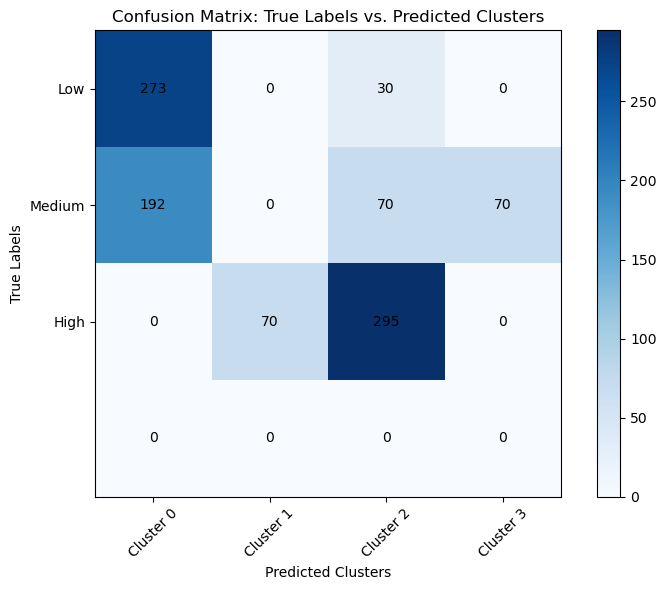

In [9]:
label_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
true_labels_mapped = true_labels.map(label_mapping)
cm = confusion_matrix(true_labels_mapped, final_labels)
cluster_labels = [f'Cluster {i}' for i in range(optimal_clusters)]
true_class_labels = ['Low', 'Medium', 'High']
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix: True Labels vs. Predicted Clusters")
plt.colorbar()
plt.xticks(np.arange(optimal_clusters), cluster_labels, rotation=45)
plt.yticks(np.arange(len(true_class_labels)), true_class_labels)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="black")

plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


The confusion matrix shows how each predicted cluster matches the original categories: Low, Medium, and High (which was removed for clustering). Cluster 0 mostly contains Low cases, and Cluster 2 mostly captures High cases. Medium cases are spread across multiple clusters. This chart helps us see if clustering can act like an unsperivsed classification tool by comparing clusters with actual categories. The results show a partial match however it is not a definitive metric 

# **Summary**

Dataset 1 (Categorical): The best variation (1_ef_b) achieved optimal clustering with extracted features and balanced data at 4 clusters using Silhouette Score, Davies Bouldin Index, and WCSS. Visualization using dendrograms and PCA showed partial separation of clusters and the the confusion matrix highlighted the inability to perfectly match true labels with clusters.

Dataset 2 (Binary): This dataset showed best clustering at 4 clusters using Silhouette Score, Davies Bouldin Index, and WCSS. PCA revealed better cluster separation compared to Dataset 1, and the confusion matrix highlighted the inability to perfectly match true labels with clusters.



The notebook focuses on the importance of preprocessing, optimal cluster number identification, and dimensionality reduction in clustering tasks. These steps are crucial for effectively leveraging clustering as an unsupervised learning tool for initial data structure insights and for refining supervised learning tasks. ​